<h1 align = center>Predict Employee Turnover</h2>

## Importing Libraries

In [1]:
from __future__ import print_function
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as image
import pandas as pd

from pandas_profiling import ProfileReport
from yellowbrick.target import ClassBalance

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import pickle
import joblib

%matplotlib inline
plt.style.use("ggplot")
warnings.simplefilter("ignore")
plt.rcParams['figure.figsize'] = (12,8)

C:\Users\SHREENATH BHARADWAJ\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


## Data Visualization

In [2]:
hr = pd.read_csv('data/employee_data.csv')
hr_orig = hr
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
hr.profile_report(title = "Data Exploration")

In [4]:
profile = ProfileReport(hr, title = "Data Exploration", explorative = True)

In [5]:
#profile.to_widgets()

In [6]:
#profile.to_file("explore.html")

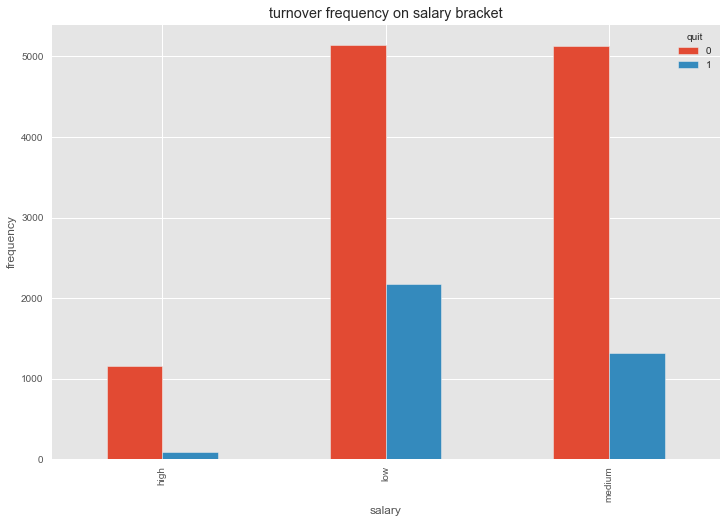

In [7]:
pd.crosstab(hr.salary, hr.quit).plot(kind = "bar")
plt.title("turnover frequency on salary bracket")
plt.xlabel("salary")
plt.ylabel("frequency")
plt.show()

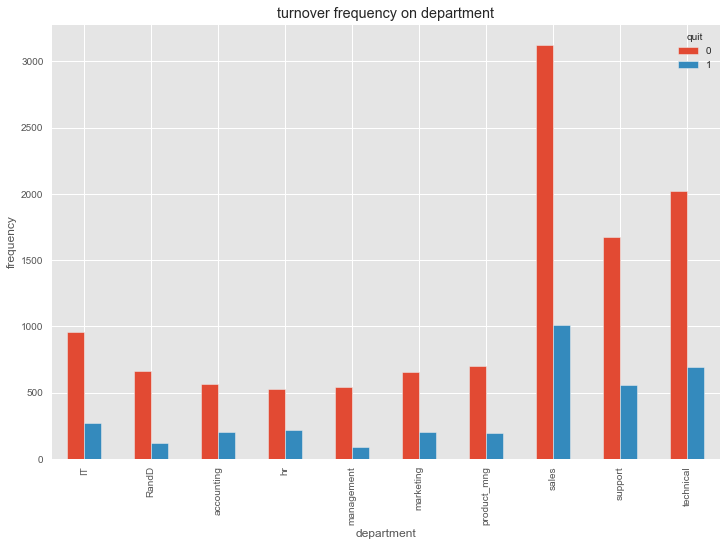

In [8]:
pd.crosstab(hr.department, hr.quit).plot(kind = "bar")
plt.title("turnover frequency on department")
plt.xlabel("department")
plt.ylabel("frequency")
plt.show()

## Encoding Categorical Features

In [9]:
dummies = pd.get_dummies(hr[['department', 'salary']], prefix = {'department':'department', 'salary':'salary'})

In [10]:
hr = pd.concat([hr, dummies], axis = 1)

In [11]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'quit',
       'promotion_last_5years', 'department', 'salary', 'department_IT',
       'department_RandD', 'department_accounting', 'department_hr',
       'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_high', 'salary_low', 'salary_medium'],
      dtype='object')

In [12]:
hr.drop(columns = ['department', 'salary'], axis = 1, inplace = True)

In [13]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


## Visualize Class Imbalance

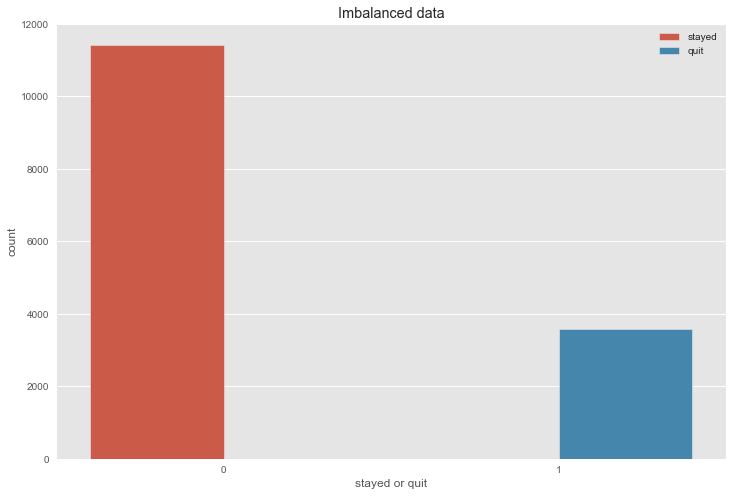

In [14]:
sns.countplot(data = hr, x = "quit", hue = "quit")
plt.ylim((0, 12000))
plt.xlabel("stayed or quit")
plt.title('Imbalanced data')
plt.legend(['stayed', 'quit'])
plt.show()

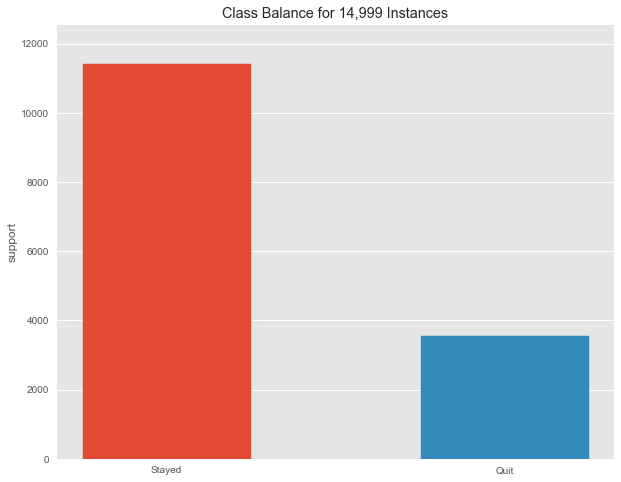

In [15]:
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (10, 8)
visualizer = ClassBalance(labels = ['Stayed', 'Quit'])
visualizer.fit(hr.quit)
visualizer.show();

## Creating Train and Test Set

In [16]:
X = hr.drop('quit', axis = 1).values
y = hr['quit'].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

## Decision Tree Classifier

In [18]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth = 25, random_state = 0)
model.fit(X_train, y_train)
print("Accuracy on test set: {:.3}".format(model.score(X_test, y_test)))

Accuracy on test set: 0.983


In [19]:
filename = "decision_tree.sav"
joblib.dump(model, open(filename, 'wb'))

## Random Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth = 25, random_state = 0)
model.fit(X_train, y_train)
print("Accuracy on test set: {:.3}".format(model.score(X_test, y_test)))

Accuracy on test set: 0.992


In [21]:
filename = "random_forest.sav"
joblib.dump(model, open(filename, "wb"))

## Logistic Regression Classifier

In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C = 100, random_state = 0)
model.fit(X_train, y_train)
print("Accuracy on test set: {:.3}".format(model.score(X_test, y_test)))

Accuracy on test set: 0.793


In [23]:
filename = "logistic_regression.sav"
joblib.dump(model, open(filename, "wb"))

## Support Vector Machine

In [24]:
from sklearn.svm import SVC

model = SVC(kernel = "rbf", C = 100, random_state = 0)
model.fit(X_train, y_train)
print("Accuracy on test set: {:.3}".format(model.score(X_test, y_test)))

Accuracy on test set: 0.899


In [25]:
filename = "svm.sav"
joblib.dump(model, open(filename, "wb"))

## K Nearest Neighbor

In [26]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 20)
model.fit(X_train, y_train)
print("Accuracy on test set: {:.3}".format(model.score(X_test, y_test)))

Accuracy on test set: 0.938


In [27]:
filename = "knn.sav"
joblib.dump(model, open(filename, "wb"))

## Guassian Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
print("Accuracy on test set: {:.3}".format(model.score(X_test, y_test)))

Accuracy on test set: 0.648


In [29]:
filename = "naive_bayes.sav"
joblib.dump(model, open(filename, "wb"))

## Multi Layer Perceptron

In [30]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier()
model.fit(X_train, y_train)
print("Accuracy on test set: {:.3}".format(model.score(X_test, y_test)))

Accuracy on test set: 0.904


In [31]:
filename = "mlp.sav"
joblib.dump(model, open(filename, "wb"))